# Модуль: Unsupervised Learning

<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 13 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Методы сжатия размерности
<h3> Plan </h3>

* ** Напоминание лекции ** 
 - Пространство признаков: проблемы при большой размерности d
 - Мультиколлинеарность


* **PCA, SVD**
 - Разложение матриц: SVD и PCA
 - Применение PCA для регрессии
 - Применение PCA для задачи классификации
  
* **tSNE**
 - Идея tSNE
 - tSNE для MNIST

In [3]:
import os
import time
import warnings
import datetime
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

import pylab

from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

sns.set_context("notebook", font_scale=1.5)
import random
from IPython.display import Image, SVG

%matplotlib inline

<h1 align="center"> Напоминание с лекции </h1>
** Вопросы **
* Что такое обучение без учителя?
* Какие проблемы возникают при обучении алгоритмов из-за большой размерности пространства признаков?
* Что такое проблема мультиколлинеарности?
* Какие пути решения проблемы мультиколлинеарности вы знаете?

### Мультиколлинеарность

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Solution

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

### Мультиколлинеарность
#### Пример

In [4]:
from numpy.linalg import inv, norm, eigvals, svd
from scipy import diag
from scipy.optimize import fmin
from sklearn.datasets import make_regression

In [5]:
### Linear Regression
d = 100
X, Y = make_regression(n_samples=200, n_features=d, effective_rank=1, noise=0)

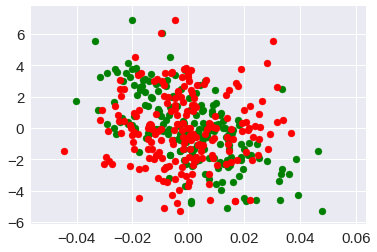

In [6]:
pylab.scatter(X[:, 0], Y, c="green")
pylab.scatter(X[:, 1], Y, c="red")

In [7]:
F_plus = np.dot(inv(np.dot(X.T, X)), X.T)
alpha = np.dot(F_plus, Y)
print "Alpha:", alpha
print "Q:", norm(np.dot(X, alpha) - Y)

Alpha: [  1.98206953e-06  -1.14986869e-06  -4.50573134e-06   8.58057319e-07
   8.34135790e-07   9.34998843e-06  -2.84782209e-06   8.95228368e-07
   4.12787813e-07   1.36395374e-06   7.81496055e-07   4.45861679e-06
  -7.82021743e-07   1.33176036e-06   2.74551167e-06  -9.93639333e-07
   9.81483026e-07  -2.69888733e-06   2.04859498e-06   2.54557926e-06
   5.40513835e+01   2.93454468e-06  -9.96649760e-07  -9.89337423e-07
  -5.93059667e-07  -3.94964445e-07  -2.55363830e-07   2.25652411e-06
   1.47495803e-06   3.44245564e-07  -6.59688340e-07   2.79620872e-06
  -8.19645720e-07   3.60880824e+01   1.27482053e-06  -3.42229578e-06
   9.43257879e+01   5.50035250e+01  -6.12616532e-07   1.33678077e-06
   9.36904793e+01   5.39483153e-07   6.23922610e-07   1.77329093e-06
   9.12813287e+01   1.32742571e-07  -4.15489922e-07   7.92116452e-08
  -3.42366548e-07  -6.27795089e-07  -1.50950473e-06  -4.34245521e-07
  -7.69366125e-07  -2.11927909e-06  -2.20607035e-08  -6.04639354e-07
  -5.45001967e-07   1.95814

### Problem: Condition Number

In [8]:
eigen_values = eigvals(np.dot(X.T, X))
# print eigen_values

print  ('cond_number:', eigen_values.max() / eigen_values.min())

('cond_number:', 1588878657.6365509)


**Замечание:** Число обусловленности матрицы не должно превышать 10^2

** Вопрос: ** что происходит с числом обусловленности матрицы регрессии, когда добавляется регуляризатор? 

---------
<h1 align="center"> PCA, SVD 

## Задача PCA

#### PCA

## $$ \| G U^{T} - F \|^2 \to \min_{G, U} $$

$$ dim F = (\ell \times n),~~~ dim G = (\ell \times m),~~~ dim U = (n\times m) $$ 
---------
<img src="pic/fig_pca_PCA.png" width="600">

#### SVD

## $$ F = V D U^{T} $$


## $$ F^{+} = U D^{-1} V^{T} $$

**Воспрос**: Как связаны решение задачи PCA и SVD? 

Если $m = n$, тогда 
## $$ F = G U^{T} = V D U^{T} $$

Если $m\geq rank(F)$

**Воспрос**: Как связаны собственные числа $\lambda_1,\dots, \lambda_m$, отвечающие главным компонентам, и ошибка приближения матрицы признаков (explained variance) 
## $$\| G U^{T} - F \|^2 ?$$

In [9]:
# U --> already transposed (U^T)
V, D, U = svd(X, full_matrices=False)

#### Compare eigen values

In [10]:
# Разберёмся с размерностями матриц
print X.shape, V.shape, D.shape, U.shape

(200, 100) (200, 100) (100,) (100, 100)


In [11]:
# Ошибка приближения (retained variance) и её связь собственными значениями
print norm(np.dot(np.dot(V, diag(D)), U) - X)
print "eigen values:", np.diagonal(np.dot(diag(D), diag(D)))
print "difference:", np.diagonal(np.dot(diag(D), diag(D))) - eigen_values[list(reversed(list(eigen_values.argsort())))]

8.79559122982e-15
eigen values: [  1.00000000e+00   4.04952051e-01   1.75161666e-01   1.37248625e-01
   1.12332279e-01   9.19698603e-02   7.52985530e-02   6.16492410e-02
   5.04741295e-02   4.13247221e-02   3.38338208e-02   2.77007896e-02
   2.26794883e-02   1.85683946e-02   1.52025157e-02   1.24467671e-02
   1.01905510e-02   8.34331749e-03   6.83093061e-03   5.59269296e-03
   4.57890972e-03   3.74889421e-03   3.06933498e-03   2.51295894e-03
   2.05743676e-03   1.68448675e-03   1.37914111e-03   1.12914524e-03
   9.24465929e-04   7.56888686e-04   6.19688044e-04   5.07357659e-04
   4.15389318e-04   3.40092009e-04   2.78443787e-04   2.27970491e-04
   1.86646452e-04   1.52813190e-04   1.25112858e-04   1.02433745e-04
   8.38656570e-05   6.86633925e-05   5.62168310e-05   4.60264484e-05
   3.76832688e-05   3.08524510e-05   2.52598505e-05   2.06810164e-05
   1.69321841e-05   1.38628999e-05   1.13499824e-05   9.29257967e-06
   7.60812075e-06   6.22900243e-06   5.09987585e-06   4.17542520e-06
  

#### Linear Regression Solution over SVD decomposition

In [12]:
V, d, U = svd(X, full_matrices=False)
D_inv = diag(1 / d)
D = diag(d)

F_svd_plus = np.dot(U.T, np.dot(D_inv, V.T))
alpha_svd = np.dot(F_svd_plus, Y)
print alpha_svd
print 'SSE: ', norm(np.dot(X, alpha_svd) - Y)

[  2.27373675e-12   1.27329258e-11  -1.81898940e-12   2.18278728e-11
  -1.09139364e-11   0.00000000e+00   1.04591891e-11   3.27418093e-11
  -9.09494702e-12   4.54747351e-12  -7.27595761e-12  -1.00044417e-11
   1.18234311e-11  -1.81898940e-12  -5.45696821e-12   1.81898940e-11
  -2.91038305e-11  -1.81898940e-12   9.09494702e-12  -4.54747351e-12
   5.40513750e+01   2.91038305e-11   0.00000000e+00  -7.27595761e-12
   5.45696821e-12  -5.45696821e-12   6.36646291e-12   1.52340363e-11
   7.27595761e-12  -7.27595761e-12  -1.81898940e-11  -1.27329258e-11
  -7.27595761e-12   3.60880825e+01   1.45519152e-11   1.09139364e-11
   9.43257875e+01   5.50035247e+01   8.18545232e-12   5.45696821e-12
   9.36904824e+01  -7.27595761e-12  -2.38031816e-12   1.09139364e-11
   9.12813302e+01   0.00000000e+00  -8.18545232e-12   1.66586744e-11
   6.36646291e-12  -7.27595761e-12   5.45696821e-12   1.27329258e-11
   1.36424205e-11   9.09494702e-12   1.81898940e-12  -3.63797881e-12
  -9.09494702e-12   1.95814150e+01

#### Truncated SVD

In [13]:
V, d, U = svd(X, full_matrices=False)
D_inv = diag([[(1 / d)[0]]+ [0.0]*(len(d)-1)][0])
D = diag([[d[0]]+ [0.0]*(len(d)-1)][0])

print "Truncated D:"
print D
print

# print "SVD approximation norm:", norm(np.dot(np.dot(V, D), U) - X)

F_svd_plus = np.dot(U.T, np.dot(D_inv, V.T))
alpha_svd = np.dot(F_svd_plus, Y)
print alpha_svd
print norm(np.dot(X, alpha_svd) - Y)

Truncated D:
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

[ -4.08340653e+00   2.35752371e+00  -3.47392610e-01   1.98606596e+00
  -2.09225161e+00   1.35026293e+00  -2.99459203e+00  -1.10378237e+00
  -7.40731601e-01  -1.34258946e+00  -6.51804989e-02  -2.88005422e+00
  -1.73359737e+00   1.26311049e+00  -2.45989204e-01  -1.19368668e+00
   1.08446151e+00  -1.98659521e+00  -3.38173805e+00  -1.21128245e+00
   5.89571609e-01  -9.46291112e-01  -5.09333577e-01   5.28325883e+00
  -5.02438169e-01   9.67527621e-01  -1.59786208e+00  -6.62086088e-01
   9.48767022e-01  -2.47169715e-01   1.72015065e+00   1.02335806e+00
   9.67417756e-01   1.78917782e+00  -1.61414730e+00   6.59637249e-01
   1.82650874e-01  -1.25375784e+00  -1.02235426e+00  -5.70415609e-02
   1.51462367e-01  -7.53297152e-02  -2.60090430e+00   1.99802720e+00
   2.36381127e+00  -2.11551

## PCA for Classifiaction

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()

cv_strategy = ShuffleSplit(iris.data.shape[0], random_state=33, test_size=0.1)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=2)),
    ('svm', SVC(kernel="linear")),
])
print "SVM:", cross_val_score(SVC(kernel="linear"), iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean()
print "PCA+SVM:", cross_val_score(estimator, iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean()

SVM: 0.977777777778
PCA+SVM: 0.960888888889


In [18]:
from sklearn.datasets import load_digits

digits = load_digits()

cv_strategy = ShuffleSplit(digits.data.shape[0], random_state=33, test_size=0.2)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=40)),
    ('svm', SVC(kernel="linear")),
])

for estimator_ in [SVC(kernel="linear"), estimator]:
    scoring = cross_val_score(estimator_, digits.data, digits.target, scoring='accuracy', cv=cv_strategy)
    print scoring.mean(), scoring.std()

0.978739256786 0.00715921990332


KeyboardInterrupt: 

In [ ]:
# One more example - eigen faces
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-pyhttp://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py", width=800, height=400)

-------
<h1 align="center">tSNE</h1> 
## Идея tSNE
Laurens, Hinton Visualizing Data using t-SNE, 2008
---------
<img src="pic/Lle_hlle_swissroll.png" width="600">

** Вопросы:**
- Почему PCA не предназначен для данных со сложной нелиненой структурой?
- В чём основаная идея SNE? 
- Какие преимущества tSNE переж SNE?

### Пример
** tSNE превносит дополнительную интепретацию в данные!!! **
http://distill.pub/2016/misread-tsne/

### tSNE vs PCA (MNIST)
http://yann.lecun.com/exdb/mnist/

Используется load_digits для упрощения

Загрузка данных (см выше)

Нарисуем примеры цифр из датасета load_digits

In [ ]:
def plot_image(image_id, dataset=X_train, im_size=28):
    pylab.imshow(255-dataset[image_id,:].reshape(im_size, im_size))
    
def plot_grid(image_ids, nrows, ncols, dataset=X_train, im_size=8):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, example_id in enumerate(image_ids):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(example_id, dataset, im_size)
        pylab.axis('off')
plot_grid(range(10), nrows=1, ncols=10)

In [ ]:
def get_neighbors(example_img, X_minus_example, Y_minus_example, estimator):
    distances, indices = estimator.kneighbors(example_img, n_neighbors=10)
    distances, indices = distances[0], indices[0]
    
    df = pd.DataFrame()
    df['distances'], df['indices']  = distances, indices
    df['labels'] = Y_minus_example[indices]
    
    return df

In [ ]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pyplot.figure(figsize=(10, 6))
pylab.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap=pyplot.cm.hot)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=200)

X_tsne = tsne.fit_transform(np.concatenate((X_train, X_test)))
X_train_tsne, X_test_tsne = X_tsne[:len(X_train)], X_tsne[len(X_train):]

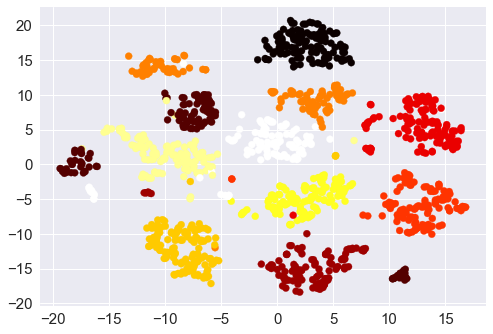

In [62]:
pylab.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=Y_train, cmap=pyplot.cm.hot)

In [44]:
# KNN_PCA2d vs KNN_TSNE2d

knn_pca = KNeighborsClassifier().fit(X_train_pca, Y_train)
y_pca = knn_pca.predict(X_test_pca)
print 'knn pca accuracy_score = %s' % accuracy_score(y_pca, Y_test)

knn pca accuracy_score = 0.4115


In [45]:
knn_tsne = KNeighborsClassifier().fit(X_train_tsne, Y_train)
y_tsne = knn_tsne.predict(X_test_tsne)
print 'knn tsne accuracy_score = %s' % accuracy_score(y_tsne, Y_test)

knn tsne accuracy_score = 0.8685


<h1 align="center">Conclusion</h1>  

**PRO PCA**:
 
 * PCA помогает избавиться от "лишних" размерностей
 * PCA строит оптимальное линейное преобразование
 * PCA применим для больших размерностей
 * существуют ядерные вариант PCA (KernelPCA)

**Cons PCA**
 * если требуется сложное нелинейное преобразование, PCA не работает
 * не подходит для визуализации на двухмерной плоскости при большой размерности исходных пространств

**PRO tSNE**:
 * отлично визуализируют (2D, 3D) данные
 * испольюзуются для предобрабтки данных, анализа структуры данных
       
**Cons tSNE**
  * стохастичность (PCA детерминирован)
  * неинтерпретируемость данных
  * не применим (сложно применим) для новых данных
  * не даёт ответ об оптимальной размерности пространства

## <a href="https://github.com/ml-mipt/ml-mipt-part1/tree/master/2017/home_work/hw8"> HW8 </a>
See at lecture
  
## Reference
- ESL https://web.stanford.edu/~hastie/local.ftp/Springer/OLD/ESLII_print4.pdf
- TSNE http://www.youtube.com/watch?v=RJVL80Gg3lA
- http://distill.pub/2016/misread-tsne/

## Обратная связь 
  ** <span style="font-size: 16pt"> <a href="https://docs.google.com/forms/d/e/1FAIpQLSdmyY3f-lwrhSGeqJPaxcXrdj0SfZzZbgRIggg-nx4EQ_eQLQ/viewform?c=0&w=1"> Отзыв </a> о семинаре </span> **
  
  ** <span style="font-size: 16pt"> <a href="https://docs.google.com/forms/d/e/1FAIpQLSdefy8neFtoxDlXD3toHi3fWB3OW-23APTRj-GuTX8wtAJahQ/viewform?c=0&w=1"> Отзыв </a> о лекции </span> **